In [12]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from functools import reduce

In [13]:
mpl.rcParams['figure.figsize'] = (9, 5)

# Goal
My goal is to visualize various aspect of the `COVID-19` pandemic.

# Data sources

In this project I use data from the following sources:
- https://github.com/CSSEGISandData/COVID-19 - JHU CSSE COVID-19 Data.
- [GDP per capita PPP](https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD) - The World Bank.
- [Population](https://data.worldbank.org/indicator/SP.POP.TOTL) - The World Bank.
- [Urban Population](https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS) - The World Bank.
- [Population living in slums](https://data.worldbank.org/indicator/EN.POP.SLUM.UR.ZS) - The World Bank.
- [Rural population](https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS) - The World Bank.
- [Life expectancy at birth](https://data.worldbank.org/indicator/SP.DYN.LE00.IN) - The World Bank.
- [Current healthcare expenditure](https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS) - The World Bank.
- https://datahub.io/JohnSnowLabs/country-and-continent-codes-list - country codes and continents.

# Data loading

In [14]:
conf_diff = pd.read_csv('./data/cleaned/conf_diff.csv')
conf_diff['Date'] = pd.to_datetime(conf_diff['Date'])

# Fancy plot

Visual for repo readme.

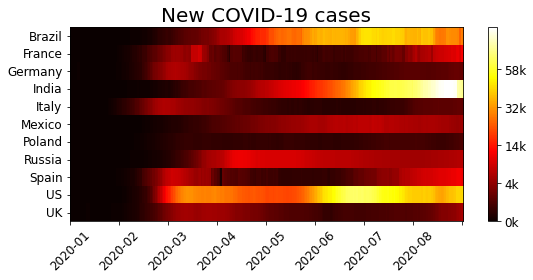

In [15]:
countries = ['Germany', 
             'France', 
             'Italy', 
             'Spain', 
             'United Kingdom', 
             'Russia', 
             'India', 
             'Brazil',
             'US', 
             'Poland', 
             'Mexico']

width = 1600
height = width / 2
dpi = 200
period = 7
step = 30
label_size = 12
n_clabels = 6

countries = sorted(countries)

plot_df = conf_diff[countries]
plot_df = plot_df.rename(columns={'United Kingdom': 'UK'})
countries = plot_df.columns.to_list()
plot_df = plot_df.rolling(period)
plot_df = plot_df.mean()
plot_df = plot_df.dropna()
plot_df = plot_df.to_numpy()
plot_df = plot_df.astype(float)
plot_df = plot_df.transpose()
plot_df = np.sqrt(plot_df)

xticks = range(plot_df.shape[1])[::step]
xlabels = list(conf_diff['Date'])[period:]
xlabels = [x.strftime(format='%Y-%m') for x in xlabels]
# xlabels = [x.date() for x in xlabels]
xlabels = xlabels[::step]

yticks = range(len(countries))
ylabels = countries

cticks = np.round(np.linspace(0, np.max(plot_df), 6), -1)
cticks = cticks.astype(np.int)
clabels = np.power(cticks, 2)
cticks = sorted(set(cticks))
clabels = np.power(cticks, 2)
clabels = [int((round(x, -3))/1000) for x in clabels]
clabels = [str(x)+'k' for x in clabels]
# clabels = list(map(str, clabels))

plt.figure(figsize=(width / dpi, height / dpi))
plt.imshow(plot_df, aspect='auto', interpolation='nearest')
plt.set_cmap('hot')

plt.yticks(ticks=yticks,
           labels=ylabels, 
           fontsize=label_size, 
           verticalalignment='center')

plt.xticks(ticks=xticks,
           labels=xlabels,
           rotation=45, 
           fontsize=label_size, 
           horizontalalignment='center')

cbar = plt.colorbar()
cbar.set_ticks(cticks)
cbar.set_ticklabels(clabels)
cbar.ax.tick_params(labelsize=label_size) 

plt.title('New COVID-19 cases', fontsize=20)

plt.tight_layout()
plt.savefig('img/covid_tiles.png')

plt.show()